# Feature Scoring on Uncertainties

###### - Dataset: 'Week23_Open_Exploration_8000_PD6.tar'
###### - Scenarios: 8000 
###### - Policies: 0


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from ema_workbench.analysis import feature_scoring
from ema_workbench import load_results

In [3]:
# Loading dataset
results = load_results('Week23_Open_Exploration_8000_PD6.tar.gz')

In [26]:
df_experiments, outcomes = results


In [27]:
# Reduce complexity of experiment by removing policies
experiments = df_experiments.drop(df_experiments.columns[19:50], axis=1)


In [32]:
outcomes

{'A.1_Expected Annual Damage': array([[8.57129826e+06, 8.57129826e+06, 1.11169351e+07],
        [6.09087573e+08, 6.09087573e+08, 7.42916627e+08],
        [5.33879578e+06, 1.06015119e+07, 1.06015119e+07],
        ...,
        [3.11766217e+08, 4.77325998e+08, 3.11766217e+08],
        [3.82471865e+08, 3.82471865e+08, 4.80092797e+08],
        [5.62599330e+07, 3.67462626e+07, 5.62599330e+07]]),
 'A.1_Expected Number of Deaths': array([[0.00609543, 0.00609543, 0.00609543],
        [0.59552315, 0.59552315, 0.59552315],
        [0.00577002, 0.00577002, 0.00577002],
        ...,
        [0.31053597, 0.31053597, 0.31053597],
        [0.31275797, 0.31275797, 0.31275797],
        [0.03880281, 0.03880281, 0.03880281]]),
 'A.2_Expected Annual Damage': array([[16852888.79589906, 16852888.79589906, 21858120.4857469 ],
        [       0.        ,        0.        ,        0.        ],
        [30651605.63342804, 60866415.44261804, 60866415.44261804],
        ...,
        [19103979.14923233, 29248922.49

C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


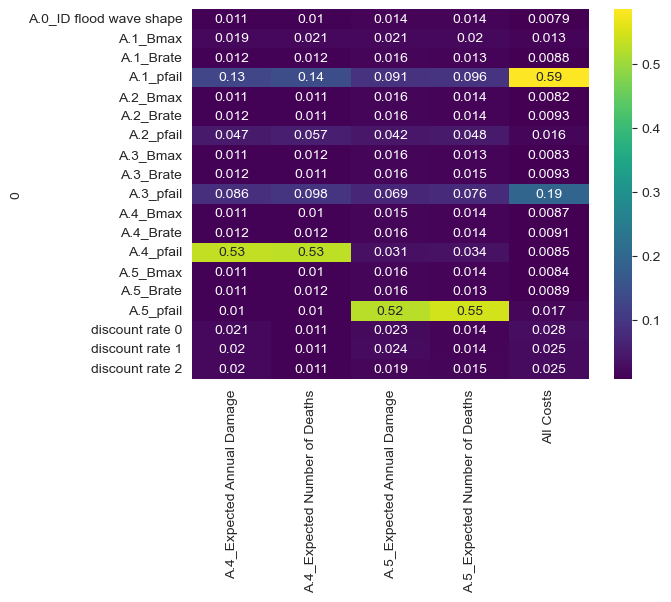

In [36]:
# Iterate through the keys in the outcomes dictionary
filtered_outcomes = {}
for key in outcomes.keys():
    # Check if the key starts with 'A.1_'
    if key.startswith('A.4_') or key.startswith('A.5_') or key.startswith('All') :
        filtered_outcomes[key] = outcomes[key]

# Picking the uncertainties and desired outcomes
x = experiments.iloc[:, [_ for _ in range(19)]]
y = filtered_outcomes

# Calculate feature scores
fs = feature_scoring.get_feature_scores_all(x, y)

# Plot the heatmap
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()


## Total Expected Annual Damage aggregation 

In [53]:
# Extract the arrays
A1 = outcomes['A.1_Expected Annual Damage']
A2 = outcomes['A.2_Expected Annual Damage']
A3 = outcomes['A.3_Expected Annual Damage']
A4 = outcomes['A.4_Expected Annual Damage']
A5 = outcomes['A.5_Expected Annual Damage']

aggregated_data = {'Total Expected Damage': A1 + A2 + A3 + A4 + A5}


C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


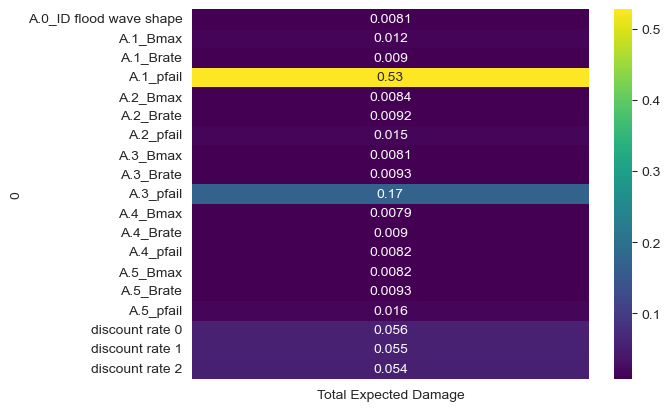

In [54]:
fs = feature_scoring.get_feature_scores_all(x, aggregated_data)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

### Contribution of objectives to Total Costs

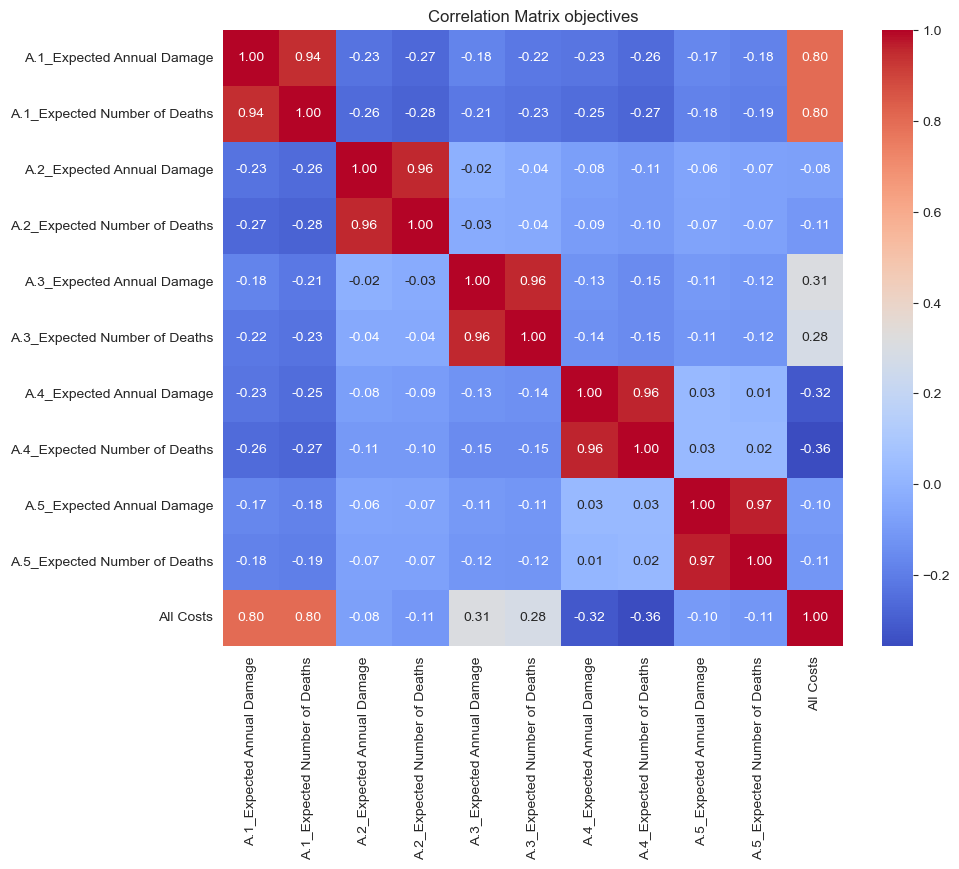

In [56]:
data = {}
for k,v in outcomes.items():
    if len(v.shape)>1:
        v=v[:,-1]
    data[k] = v
data = pd.DataFrame.from_dict(data)

#calcualting correlations between the outcomes of interest
correlations = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix objectives')
plt.show()